In [17]:
import pandas as pd

In [18]:
train_file = "/kaggle/input/spaceship-titanic/train.csv"
test_file = "/kaggle/input/spaceship-titanic/test.csv"

In [19]:
df_train = pd.read_csv(train_file)

In [20]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Data undretanding

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Feature 1: Total Spending (VERY IMPORTANT)
Human logic

If someone spent money → they were awake

Awake people likely weren’t transported

In [22]:
spend_cols = [
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck"
]



In [23]:
df_train[spend_cols] = df_train[spend_cols].fillna(0)
df_train["TotalSpend"] = df_train[spend_cols].sum(axis=1)


In [24]:
df_train


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


# Feature 2: IsSpender (binary behavior feature)

In [25]:
df_train["IsSpender"] = (df_train["TotalSpend"] > 0).astype(int)

# Cabin structure

Deck / CabinNumber / Side

## all in one feald we need to split it into musltiple choices


In [26]:
df_train[["Deck", "CabinNum", "Side"]] = df_train["Cabin"].str.split("/", expand=True)

In [27]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend,IsSpender,Deck,CabinNum,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,1,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,1,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,0,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,1,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,1,E,608,S


CabinNum is too noicy to work with and in real case senario it dosnt effect any thing so we are focusing with the 
### Deck
and 
### Side


In [28]:
# Handle missing values
df_train["Deck"] = df_train["Deck"].fillna("Unknown")
df_train["Side"] = df_train["Side"].fillna("Unknown")

In [29]:
# One-hot encode Deck and Side
df_train = pd.get_dummies(
    df_train,
    columns=["Deck", "Side"],
    drop_first=True
)

In [30]:
# Drop unused columns
df_train = df_train.drop(columns=["CabinNum", "Cabin"])

# HomePlanet

### Indicates origin

### Passengers from the same planet share:

### culture

### wealth

### CryoSleep habits

### Strong correlation with Transported

# Destination

### Indicates where they were going

### Different destinations were affected differently

In [32]:
df_train[["HomePlanet", "Destination"]].isna().sum()


HomePlanet     201
Destination    182
dtype: int64

In [33]:
df_train["HomePlanet"] = df_train["HomePlanet"].fillna("Unknown")
df_train["Destination"] = df_train["Destination"].fillna("Unknown")


In [34]:
df_train = pd.get_dummies(
    df_train, 
    columns=["HomePlanet", "Destination"], 
    drop_first=True
)


In [36]:
df_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_T,Deck_Unknown,Side_S,Side_Unknown,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,False,False,False,False,True,False,False,False,True,False
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,False,False,True,False,False,False,False,False,True,False
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,False,False,True,False,True,False,False,False,True,False
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,False,False,True,False,True,False,False,False,True,False
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,...,False,False,False,False,True,False,False,False,False,False
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,...,False,False,True,False,False,False,False,True,False,False
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,...,False,False,True,False,False,False,False,False,True,False
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,...,False,False,True,False,True,False,False,False,False,False


# Convert boolean to Number 0 1

In [37]:
# Automatically convert all boolean columns to int
bool_cols = df_train.select_dtypes(include="bool").columns

for col in bool_cols:
    df_train[col] = df_train[col].astype(int)

# Quick check
print(df_train[bool_cols].head())


   Transported  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  \
0            0       1       0       0       0       0       0       0   
1            1       0       0       0       0       1       0       0   
2            0       0       0       0       0       0       0       0   
3            0       0       0       0       0       0       0       0   
4            1       0       0       0       0       1       0       0   

   Deck_Unknown  Side_S  Side_Unknown  HomePlanet_Europa  HomePlanet_Mars  \
0             0       0             0                  1                0   
1             0       1             0                  0                0   
2             0       1             0                  1                0   
3             0       1             0                  1                0   
4             0       1             0                  0                0   

   HomePlanet_Unknown  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  \
0              

In [41]:
# Boolean
df_train["CryoSleep"] = df_train["CryoSleep"].fillna(False).astype(int)
df_train["VIP"] = df_train["VIP"].fillna(False).astype(int)

In [45]:
df_train


,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_T,Deck_Unknown,Side_S,Side_Unknown,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,0,0,0,1,0,0,0,1,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,1,0,0,0,0,0,1,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0,1,0,1,0,0,0,1,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0,1,0,1,0,0,0,1,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,...,0,0,0,0,1,0,0,0,0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,...,0,0,1,0,0,0,0,1,0,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,...,0,0,1,0,0,0,0,0,1,0
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,...,0,0,1,0,1,0,0,0,0,0


# final function for data engineering 

In [80]:
def feature_engineering(df, keep_target=True):
    df = df.copy()  # avoid modifying original
    
    # ===============================
    # 1️⃣ Handle missing values
    # ===============================
    df["HomePlanet"] = df["HomePlanet"].fillna("Unknown")
    df["Destination"] = df["Destination"].fillna("Unknown")
    
    spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    df[spend_cols] = df[spend_cols].fillna(0)
    
    df["Age"] = df["Age"].fillna(df["Age"].median())
    
    # ===============================
    # 2️⃣ Handle boolean/object columns
    # ===============================
    for col in df.columns:
        # Convert True/False (object, string, or bool) to int
        if df[col].dropna().isin([True, False, "True", "False"]).all():
            df[col] = df[col].replace({"True": 1, "False": 0}).fillna(0).astype(int)
    
    # ===============================
    # 3️⃣ Create new features
    # ===============================
    # Total spending
    df["TotalSpend"] = df[spend_cols].sum(axis=1)
    
    # IsSpender
    df["IsSpender"] = (df["TotalSpend"] > 0).astype(int)
    
    # Cabin split
    df[["Deck", "CabinNum", "Side"]] = df["Cabin"].str.split("/", expand=True)
    df["Deck"] = df["Deck"].fillna("Unknown")
    df["Side"] = df["Side"].fillna("Unknown")
    
    # Group size
    df["Group"] = df["PassengerId"].str.split("_").str[0]
    df["GroupSize"] = df.groupby("Group")["PassengerId"].transform("count")
    df["IsSolo"] = (df["GroupSize"] == 1).astype(int)
    
    # Age group
    df["AgeGroup"] = pd.cut(
        df["Age"], bins=[0,12,18,35,60,100], labels=["Child","Teen","YoungAdult","Adult","Senior"]
    )
    
    # CryoSleep spending cleanup
    if "CryoSleep" in df.columns:
        df.loc[df["CryoSleep"] == 1, spend_cols] = 0
    
    # ===============================
    # 4️⃣ Encode categorical columns
    # ===============================
    cat_cols = ["HomePlanet", "Destination", "Deck", "Side", "AgeGroup","CabinNum"]
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    
    # ===============================
    # 5️⃣ Drop unnecessary columns
    # ===============================
    drop_cols = ["Cabin", "Name", "PassengerId"]
    for col in drop_cols:
        if col in df.columns:
            df = df.drop(columns=[col])
    
    # ===============================
    # 6️⃣ Keep target column if required
    # ===============================
    if keep_target and "Transported" in df.columns:
        # Make sure Transported is numeric
        df["Transported"] = df["Transported"].replace({True:1, False:0}).astype(int)
    elif "Transported" in df.columns:
        # Drop it if not keeping
        df = df.drop(columns=["Transported"])
    
    return df


In [81]:
df_train = pd.read_csv(train_file)

In [82]:
df = feature_engineering(df_train)

In [104]:
# After creating df_train_fe
print("Any NaNs in X? ", df.isna().any().any())
print("Columns with NaNs:")
print(df.columns[df.isna().any()])

Any NaNs in X?  False
Columns with NaNs:
Index([], dtype='object')


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Columns: 1850 entries, CryoSleep to CabinNum_999
dtypes: bool(1836), float64(7), int64(6), object(1)
memory usage: 16.1+ MB


# Visualizing Data and impact  

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")


# Numeric features vs Transported

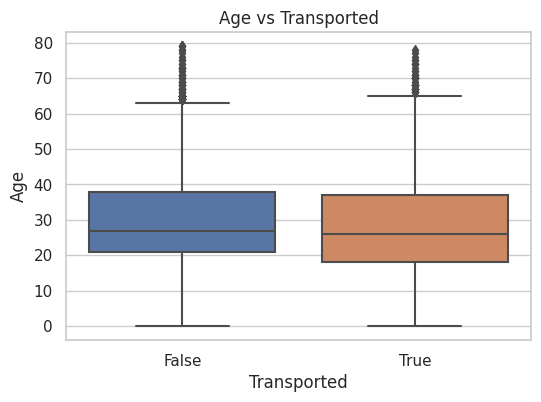

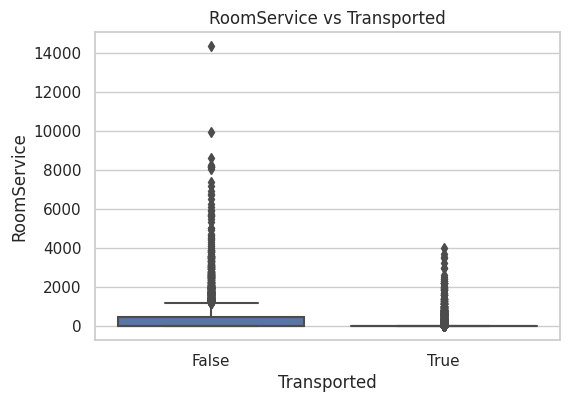

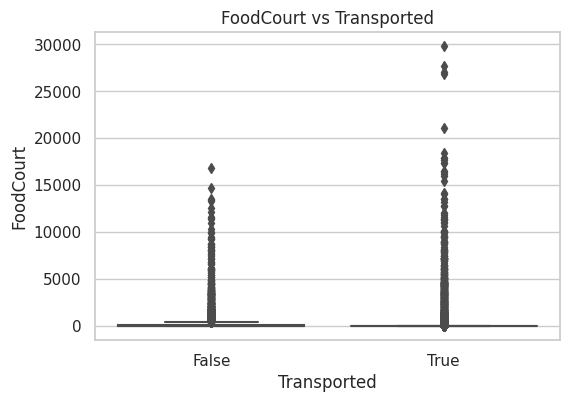

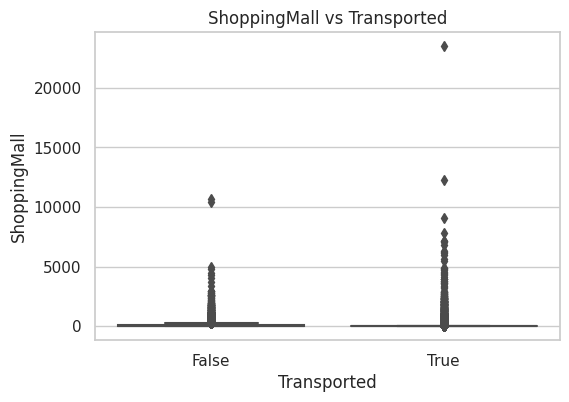

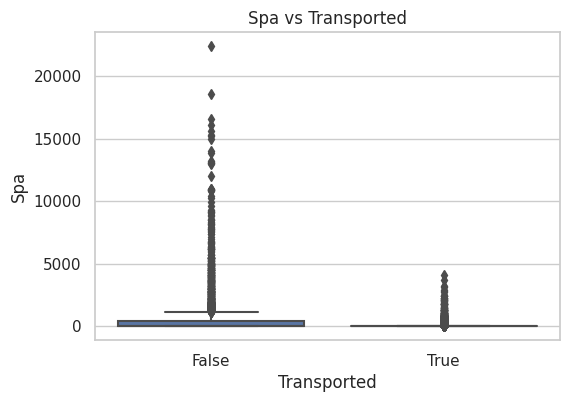

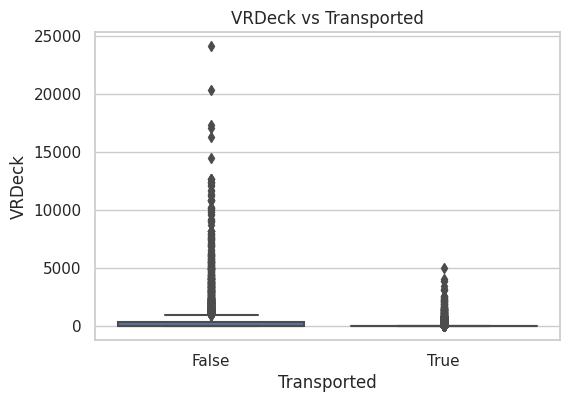

ValueError: Could not interpret input 'TotalSpend'

<Figure size 600x400 with 0 Axes>

In [85]:
numeric_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalSpend", "GroupSize"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Transported", y=col, data=df_train)
    plt.title(f"{col} vs Transported")
    plt.show()


# Categorical / boolean features vs Transported

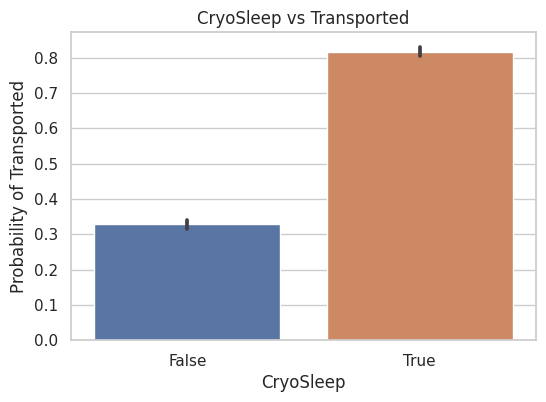

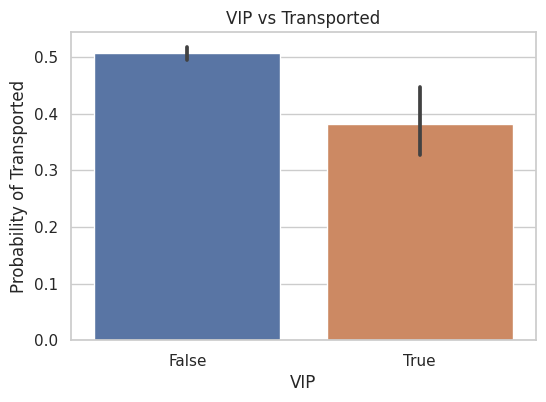

ValueError: Could not interpret input 'IsSpender'

<Figure size 600x400 with 0 Axes>

In [86]:
cat_cols = ["CryoSleep", "VIP", "IsSpender", "IsSolo", "HomePlanet", "Destination", "Deck", "Side", "AgeGroup"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y="Transported", data=df_train)
    plt.title(f"{col} vs Transported")
    plt.ylabel("Probability of Transported")
    plt.show()


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
def plot_features_vs_target(df, target="Transported"):
    sns.set(style="whitegrid")
    
    # Numeric features (all numeric except target)
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
    if target in numeric_cols:
        numeric_cols.remove(target)
    
    # Plot numeric features
    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f"{col} vs {target}")
        plt.show()
    
    # Categorical features (all object / boolean / encoded dummy columns with 2 unique values)
    cat_cols = df.select_dtypes(include=["uint8", "object", "bool"]).columns.tolist()
    
    # Plot categorical / dummy features
    for col in cat_cols:
        if df[col].nunique() > 1:
            plt.figure(figsize=(6,4))
            sns.barplot(x=col, y=target, data=df)
            plt.title(f"{col} vs {target}")
            plt.ylabel(f"Probability of {target}")
            plt.show()


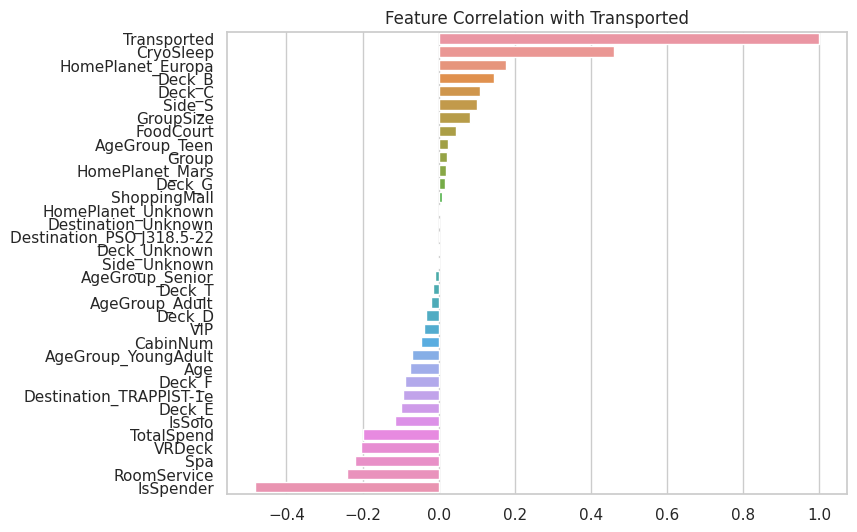

In [89]:
target_corr = corr["Transported"].sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Feature Correlation with Transported")
plt.show()


# Modeling 

### target selection

In [105]:
X = df.drop(columns=["Transported"])
y = df["Transported"]


### Train-test split

In [128]:
def feature_engineering(df, keep_target=True):
    df = df.copy()  # avoid modifying original
    
    # ===============================
    # 1️⃣ Handle missing values
    # ===============================
    df["HomePlanet"] = df["HomePlanet"].fillna("Unknown")
    df["Destination"] = df["Destination"].fillna("Unknown")
    
    spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    df[spend_cols] = df[spend_cols].fillna(0)
    
    df["Age"] = df["Age"].fillna(df["Age"].median())
    
    # ===============================
    # 2️⃣ Handle boolean/object columns
    # ===============================
    for col in df.columns:
        # Convert True/False (object, string, or bool) to int
        if df[col].dropna().isin([True, False, "True", "False"]).all():
            df[col] = (
                df[col]
                .replace({"True": 1, "False": 0})
                .fillna(0)
                .astype(int)
            )
    
    # ===============================
    # 3️⃣ Create new features
    # ===============================
    # Total spending
    df["TotalSpend"] = df[spend_cols].sum(axis=1)
    
    # IsSpender
    df["IsSpender"] = (df["TotalSpend"] > 0).astype(int)
    
    # Cabin split
    df[["Deck", "CabinNum", "Side"]] = df["Cabin"].str.split("/", expand=True)
    df["Deck"] = df["Deck"].fillna("Unknown")
    df["Side"] = df["Side"].fillna("Unknown")
    
    # Group id + size (Group encoded as numeric)
    df["Group"] = df["PassengerId"].str.split("_").str[0]
    df["Group"], _ = pd.factorize(df["Group"])         # 0,1,2,... same group -> same int
    df["GroupSize"] = df.groupby("Group")["Group"].transform("count")
    df["IsSolo"] = (df["GroupSize"] == 1).astype(int)
    
    # Age group
    df["AgeGroup"] = pd.cut(
        df["Age"],
        bins=[0, 12, 18, 35, 60, 100],
        labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"]
    )
    
    # CryoSleep spending cleanup
    if "CryoSleep" in df.columns:
        df.loc[df["CryoSleep"] == 1, spend_cols] = 0
    
    # ===============================
    # 4️⃣ Encode categorical columns
    # ===============================
    # CabinNum removed from here; we will drop it instead
    cat_cols = ["HomePlanet", "Destination", "Deck", "Side", "AgeGroup"]
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    
    # ===============================
    # 5️⃣ Drop unnecessary columns
    # ===============================
    drop_cols = ["Cabin", "CabinNum", "Name", "PassengerId"]
    for col in drop_cols:
        if col in df.columns:
            df = df.drop(columns=[col])
    
    # ===============================
    # 6️⃣ Keep target column if required
    # ===============================
    if keep_target and "Transported" in df.columns:
        df["Transported"] = df["Transported"].replace({True: 1, False: 0}).astype(int)
    elif "Transported" in df.columns:
        df = df.drop(columns=["Transported"])
            # ===============================
    # 7️⃣ Ensure all features are numeric
    # ===============================
    # Convert Group to numeric (it may have become object again)
    if "Group" in df.columns:
        df["Group"] = df["Group"].astype("int64")

    # (Optional safety) drop any remaining non-numeric columns
    non_numeric = df.select_dtypes(exclude=["int64", "float64", "bool"]).columns
    df = df.drop(columns=non_numeric)

    
    return df


In [129]:
df_train = pd.read_csv(train_file)
df = feature_engineering(df_train)

In [130]:
X = df.drop(columns=["Transported"])
y = df["Transported"]


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # for reproducibility
    stratify=y            # keeps class ratios the same in train/test
)


In [132]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [133]:
from xgboost import XGBClassifier        # pip install xgboost
from lightgbm import LGBMClassifier      # pip install lightgbm


In [134]:
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    "LogisticRegression": LogisticRegression(
        max_iter=1000,
        random_state=42
    )
}

# Optional – add boosting libraries
models["XGBoost"] = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

models["LightGBM"] = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [135]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   TotalSpend                 8693 non-null   float64
 9   IsSpender                  8693 non-null   int64  
 10  Group                      8693 non-null   int64  
 11  GroupSize                  8693 non-null   int64  
 12  IsSolo                     8693 non-null   int64  
 13  HomePlanet_Europa          8693 non-null   bool 

In [136]:
scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)              # train
    y_pred = model.predict(X_test)           # predict on test
    acc = accuracy_score(y_test, y_pred)     # accuracy
    scores[name] = acc
    print(f"{name}: accuracy = {acc:.4f}")


RandomForest: accuracy = 0.8074
GradientBoosting: accuracy = 0.7987
LogisticRegression: accuracy = 0.7855
XGBoost: accuracy = 0.8039
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1918
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
LightGBM: accuracy = 0.8085


In [137]:
best_model_name = max(scores, key=scores.get)
print("\nBest model:", best_model_name, "with accuracy =", scores[best_model_name])


Best model: LightGBM with accuracy = 0.8085106382978723


# test

In [138]:
df_test = pd.read_csv(test_file)

In [143]:
df_test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [139]:
test= feature_engineering(df_test)

In [140]:
test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend,IsSpender,...,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,False,True,False,False,True,False,False,True,False,False
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,2832.0,1,...,True,False,False,False,True,False,False,True,False,False
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,False,False,True,False,False,True,False,False
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,7418.0,1,...,False,False,False,False,True,False,False,False,True,False
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,645.0,1,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,False,True,False,False,True,False,False,True,False,False
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1018.0,1,...,False,False,False,True,False,True,False,False,True,False
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,False,False,False,False,False,True,False,False
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,3203.0,1,...,False,False,False,False,False,False,False,True,False,False


In [141]:
prediction = models["LightGBM"].predict(test)

In [142]:
prediction

array([1, 0, 1, ..., 1, 1, 1])

In [145]:
res["PassengerId"] = df_test["PassengerId"]
res["Transported"] = prediction

NameError: name 'res' is not defined

In [146]:
# Load test and keep PassengerId
df_test_raw = pd.read_csv(test_file)
passenger_ids = df_test_raw["PassengerId"].copy()

# Apply same feature engineering, but without target
df_test = feature_engineering(df_test_raw, keep_target=False)

# Predict
pred_proba = models["LightGBM"].predict(df_test)
# If model outputs 0/1 directly, you can skip argmax / threshold

# Convert to bool if needed (Kaggle expects True/False)
pred_bool = (pred_proba == 1)

# Build submission DataFrame
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": pred_bool
})

print(submission.head())


  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [147]:
submission.to_csv("submission.csv", index=False)
